In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.rcParams["figure.figsize"] = (9,5)

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer

from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_x.csv")

train.drop(columns = "index", inplace = True)
test.drop(columns = "index", inplace = True)

train.Cinsiyet.replace({"Kadın" : 0, "Erkek" : 1}, inplace = True)
test.Cinsiyet.replace({"Kadın" : 0, "Erkek" : 1}, inplace = True)

train["Medeni Durum"].replace({"Evli" : 1, "Bekar" : 0}, inplace = True)
test["Medeni Durum"].replace({"Evli" : 1, "Bekar" : 0}, inplace = True)

train["Eğitime Devam Etme Durumu"].replace({"Ediyor" : 1, "Etmiyor" : 0}, inplace = True)
test["Eğitime Devam Etme Durumu"].replace({"Ediyor" : 1, "Etmiyor" : 0}, inplace = True)

train["Öbek İsmi"].replace({"obek_1" : 0, "obek_2" : 1, "obek_3" : 2, "obek_4" : 3, "obek_5" : 4, "obek_6" : 5, "obek_7" : 6, "obek_8" : 7}, inplace = True)

train.rename(columns = {"Cinsiyet" : "cinsiyet", "Yaş Grubu" : "yas_grubu" , "Medeni Durum" : "medeni_durum", "Eğitim Düzeyi" : "egitim_duzeyi",
                       "İstihdam Durumu" : "istihdam_durumu", "Yıllık Ortalama Gelir" : "ort_gelir", "Yaşadığı Şehir" : "sehir", "En Çok İlgilendiği Ürün Grubu" : "ilgilendiği_ürün",
                       "Yıllık Ortalama Satın Alım Miktarı" : "ort_satın_alma", "Yıllık Ortalama Sipariş Verilen Ürün Adedi" : "ort_adet", "Eğitime Devam Etme Durumu" : "egitim_devam",
                       "Öbek İsmi" : "öbek", "Yıllık Ortalama Sepete Atılan Ürün Adedi" : "ort_sepete_atma"}, inplace = True)

test.rename(columns = {"Cinsiyet" : "cinsiyet", "Yaş Grubu" : "yas_grubu" , "Medeni Durum" : "medeni_durum", "Eğitim Düzeyi" : "egitim_duzeyi",
                       "İstihdam Durumu" : "istihdam_durumu", "Yıllık Ortalama Gelir" : "ort_gelir", "Yaşadığı Şehir" : "sehir", "En Çok İlgilendiği Ürün Grubu" : "ilgilendiği_ürün",
                       "Yıllık Ortalama Satın Alım Miktarı" : "ort_satın_alma", "Yıllık Ortalama Sipariş Verilen Ürün Adedi" : "ort_adet", "Eğitime Devam Etme Durumu" : "egitim_devam",
                       "Yıllık Ortalama Sepete Atılan Ürün Adedi" : "ort_sepete_atma"}, inplace = True)

train = pd.concat([train, pd.get_dummies(train.ilgilendiği_ürün, drop_first = True, dtype = "int")], axis = 1).drop(columns = "ilgilendiği_ürün")
test = pd.concat([test, pd.get_dummies(test.ilgilendiği_ürün, drop_first = True, dtype = "int")], axis = 1).drop(columns = "ilgilendiği_ürün")

train.rename(columns = {"Ev ve Mobilya" : "ev_mobilya", "Giyim" : "giyim", 
                        "Kozmetik" : "kozmetik" , "Spor Malzemeleri" : "spor_malz"}, inplace = True)

test.rename(columns = {"Ev ve Mobilya" : "ev_mobilya", "Giyim" : "giyim", 
                        "Kozmetik" : "kozmetik" , "Spor Malzemeleri" : "spor_malz"}, inplace = True)

train = pd.concat([train, pd.get_dummies(train.yas_grubu, drop_first = True, dtype = "int")], axis = 1).drop(columns = "yas_grubu")
test = pd.concat([test, pd.get_dummies(test.yas_grubu, drop_first = True, dtype = "int")], axis = 1).drop(columns = "yas_grubu")

train = pd.concat([train, pd.get_dummies(train.istihdam_durumu, drop_first = True, dtype = "int")], axis = 1).drop(columns = "istihdam_durumu")
test = pd.concat([test, pd.get_dummies(test.istihdam_durumu, drop_first = True, dtype = "int")], axis = 1).drop(columns = "istihdam_durumu")

train.rename(columns = {"Kendi İşinin Sahibi" : "kendi_is", "İşsiz veya Düzenli Bir İşi Yok" : "issiz", 
                        "Emekli" : "emekli"}, inplace = True)

test.rename(columns = {"Kendi İşinin Sahibi" : "kendi_is", "İşsiz veya Düzenli Bir İşi Yok" : "issiz", 
                        "Emekli" : "emekli"}, inplace = True)

train = pd.concat([train, pd.get_dummies(train.sehir, drop_first = True, dtype = "int")], axis = 1).drop(columns = "sehir")
test = pd.concat([test, pd.get_dummies(test.sehir, drop_first = True, dtype = "int")], axis = 1).drop(columns = "sehir")

train.rename(columns = {"Küçük Şehir" : "küc_sehir", "Köy veya Kasaba" : "köy", 
                        "Kırsal" : "kırsal"}, inplace = True)

test.rename(columns = {"Küçük Şehir" : "küc_sehir", "Köy veya Kasaba" : "köy", 
                        "Kırsal" : "kırsal"}, inplace = True)

train = pd.concat([train, pd.get_dummies(train.egitim_duzeyi, drop_first = True, dtype = "int")], axis = 1).drop(columns = "egitim_duzeyi")
test = pd.concat([test, pd.get_dummies(test.egitim_duzeyi, drop_first = True, dtype = "int")], axis = 1).drop(columns = "egitim_duzeyi")

train.rename(columns = {"Üniversite Mezunu" : "üniversite", "Yüksekokul Mezunu" : "yüksek_okul", 
                        "Yüksek Lisans Mezunu" : "yük_lisans", "İlkokul Mezunu" : "ilkokul",
                       "Ortaokul Mezunu" : "ortaokul", "Eğitimsiz" : "egitimsiz",
                       "Lise Mezunu" : "lise", "Doktora Ötesi" : "doktora+"}, inplace = True)

test.rename(columns = {"Üniversite Mezunu" : "üniversite", "Yüksekokul Mezunu" : "yüksek_okul", 
                        "Yüksek Lisans Mezunu" : "yük_lisans", "İlkokul Mezunu" : "ilkokul",
                       "Ortaokul Mezunu" : "ortaokul", "Eğitimsiz" : "egitimsiz",
                       "Lise Mezunu" : "lise", "Doktora Ötesi" : "doktora+"}, inplace = True)

In [3]:
X = train.drop(columns = ["öbek"])
y = train.öbek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 101)

In [4]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [5]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

eval_metric(rf, X_train, y_train, X_test, y_test)

Train_Set
[[349   0   0   0   0   0   0   0]
 [  0 261   0   0   0   0   0   0]
 [  0   0 340   0   0   0   0   0]
 [  0   0   0 374   0   0   0   0]
 [  0   0   0   0 354   0   0   0]
 [  0   0   0   0   0 351   0   0]
 [  0   0   0   0   0   0 370   0]
 [  0   0   0   0   0   0   0 331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       261
           2       1.00      1.00      1.00       340
           3       1.00      1.00      1.00       374
           4       1.00      1.00      1.00       354
           5       1.00      1.00      1.00       351
           6       1.00      1.00      1.00       370
           7       1.00      1.00      1.00       331

    accuracy                           1.00      2730
   macro avg       1.00      1.00      1.00      2730
weighted avg       1.00      1.00      1.00      2730


Test_Set
[[325   0   4   5   2   2   2   3]
 [  1 269   1

In [6]:
rf.predict_proba(X_test)

array([[0.06, 0.02, 0.  , ..., 0.87, 0.01, 0.  ],
       [0.  , 0.  , 0.03, ..., 0.93, 0.03, 0.  ],
       [0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.94, ..., 0.  , 0.03, 0.01],
       [0.  , 0.  , 0.01, ..., 0.01, 0.  , 0.94],
       [0.01, 0.01, 0.  , ..., 0.  , 0.86, 0.02]])

In [7]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

rf_grid_model = GridSearchCV(rf, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 3).fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[CV 1/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50;, score=0.940 total time=   0.3s
[CV 4/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64;, score=0.940 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64;, score=0.936 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50;, score=0.938 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50;, score=0.923 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64;, score=0.907 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100;, score=0.949 total time=   0.3s
[CV 1/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=64;, score=0.943 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50;, score=0.903 total time

In [9]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[334   2   3   3   2   1   4   0]
 [  2 247   3   0   0   5   2   2]
 [  0   0 330   1   1   3   4   1]
 [  1   2   5 349   6   5   2   4]
 [  3   1   1   2 337   4   1   5]
 [  3   2   3   1   2 337   0   3]
 [  2   1   7   3   1   1 353   2]
 [  2   1   2   3   4   0   1 318]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       349
           1       0.96      0.95      0.96       261
           2       0.93      0.97      0.95       340
           3       0.96      0.93      0.95       374
           4       0.95      0.95      0.95       354
           5       0.95      0.96      0.95       351
           6       0.96      0.95      0.96       370
           7       0.95      0.96      0.95       331

    accuracy                           0.95      2730
   macro avg       0.95      0.95      0.95      2730
weighted avg       0.95      0.95      0.95      2730


Test_Set
[[325   0   4   5   2   2   2   3]
 [  1 267   1

In [10]:
rf_grid_model.predict_proba(X_test)

array([[0.04258521, 0.07611777, 0.06446894, ..., 0.61748504, 0.09172781,
        0.01727319],
       [0.01895198, 0.01936839, 0.06986347, ..., 0.69143889, 0.09563915,
        0.02170709],
       [0.0449479 , 0.02637228, 0.07664041, ..., 0.01383844, 0.03964157,
        0.02867887],
       ...,
       [0.05640113, 0.03125607, 0.66823186, ..., 0.06470179, 0.10501383,
        0.02297497],
       [0.01787034, 0.01393944, 0.01710518, ..., 0.00966186, 0.02825371,
        0.82824939],
       [0.03461738, 0.04350055, 0.0260894 , ..., 0.02770728, 0.57437699,
        0.08927854]])

In [11]:
class_names = ["1", "2", "3", "4", "5", "6", "7", "8"]
df2 = pd.DataFrame(rf_grid_model.predict_proba(X_test), columns=class_names)
df2.head()

1         2         3         4         5         6         7  \
0  0.042585  0.076118  0.064469  0.069610  0.020732  0.617485  0.091728   
1  0.018952  0.019368  0.069863  0.059974  0.023057  0.691439  0.095639   
2  0.044948  0.026372  0.076640  0.016927  0.752954  0.013838  0.039642   
3  0.036470  0.059001  0.091299  0.087515  0.023261  0.540393  0.141472   
4  0.034122  0.024734  0.081566  0.147619  0.082222  0.044743  0.545271   

          8  
0  0.017273  
1  0.021707  
2  0.028679  
3  0.020588  
4  0.039723

In [12]:
X_test["1"] = df2["1"].values
X_test["2"] = df2["2"].values
X_test["3"] = df2["3"].values
X_test["4"] = df2["4"].values
X_test["5"] = df2["5"].values
X_test["6"] = df2["6"].values
X_test["7"] = df2["7"].values
X_test["8"] = df2["8"].values

In [13]:
X_test.head()

cinsiyet  medeni_durum      ort_gelir  ort_satın_alma   ort_adet  \
4274         0             1  454711.165318    42143.936686  28.148974   
4941         1             1  481091.699776    38537.470688  29.910590   
4272         1             1  187810.367522     4290.553701   8.311429   
5321         0             1  478175.944255    39028.282180  28.337045   
4125         1             0  327266.505932    25165.705042  22.678396   

      egitim_devam  ort_sepete_atma  ev_mobilya  giyim  kozmetik  ...  \
4274             0        58.463829           0      0         0  ...   
4941             0        50.633862           0      0         0  ...   
4272             0       111.506191           0      0         0  ...   
5321             0        55.791345           1      0         0  ...   
4125             0        97.884462           0      0         0  ...   

      üniversite  ilkokul         1         2         3         4         5  \
4274           0        0  0.042585  0.076118  0.064469  0.069610  0.020732   
4941           1        0  0.018952  0.019368  0.069863  0.059974  0.023057   
4272           0        0  0.044948  0.026372  0.076640  0.016927  0.752954   
5321           0        0  0.036470  0.059001  0.091299  0.087515  0.023261   
4125           0        0  0.034122  0.024734  0.081566  0.147619  0.082222   

             6         7         8  
4274  0.617485  0.091728  0.017273  
4941  0.691439  0.095639  0.021707  
4272  0.013838  0.039642  0.028679  
5321  0.540393  0.141472  0.020588  
4125  0.044743  0.545271  0.039723  

[5 rows x 37 columns]

In [14]:
class_names = ["1", "2", "3", "4", "5", "6", "7", "8"]
df3 = pd.DataFrame(rf_grid_model.predict_proba(test), columns = class_names)

In [15]:
df3.head()

1         2         3         4         5         6         7  \
0  0.170727  0.067262  0.479359  0.015864  0.044264  0.074787  0.127632   
1  0.070208  0.064180  0.682043  0.019285  0.057312  0.014601  0.067988   
2  0.189420  0.561882  0.035003  0.014401  0.132986  0.026691  0.022195   
3  0.039264  0.048761  0.041878  0.037070  0.021722  0.731783  0.067868   
4  0.593163  0.022961  0.172273  0.012519  0.055323  0.027882  0.099591   

          8  
0  0.020104  
1  0.024383  
2  0.017422  
3  0.011654  
4  0.016288

In [16]:
test["1"] = df3["1"].values
test["2"] = df3["2"].values
test["3"] = df3["3"].values
test["4"] = df3["4"].values
test["5"] = df3["5"].values
test["6"] = df3["6"].values
test["7"] = df3["7"].values
test["8"] = df3["8"].values

In [17]:
test.head()

cinsiyet  medeni_durum      ort_gelir  ort_satın_alma   ort_adet  \
0         1             1  365331.930346     5566.587664  15.442635   
1         1             0  414899.236174     6756.766203  14.957246   
2         0             1  152825.872271     4493.915682  10.907930   
3         0             1  489052.908472    42670.646595  32.333021   
4         1             1  323635.711534     5959.266948   4.519968   

   egitim_devam  ort_sepete_atma  ev_mobilya  giyim  kozmetik  ...  \
0             0        19.646460           0      1         0  ...   
1             0        19.675863           0      0         0  ...   
2             0        46.904518           0      1         0  ...   
3             0        48.083609           0      0         1  ...   
4             0        12.752491           0      1         0  ...   

   üniversite  ilkokul         1         2         3         4         5  \
0           0        0  0.170727  0.067262  0.479359  0.015864  0.044264   
1           0        0  0.070208  0.064180  0.682043  0.019285  0.057312   
2           0        0  0.189420  0.561882  0.035003  0.014401  0.132986   
3           0        0  0.039264  0.048761  0.041878  0.037070  0.021722   
4           0        0  0.593163  0.022961  0.172273  0.012519  0.055323   

          6         7         8  
0  0.074787  0.127632  0.020104  
1  0.014601  0.067988  0.024383  
2  0.026691  0.022195  0.017422  
3  0.731783  0.067868  0.011654  
4  0.027882  0.099591  0.016288  

[5 rows x 37 columns]

In [18]:
X_test["öbek"] = y_test.values

In [19]:
X_test.head()

cinsiyet  medeni_durum      ort_gelir  ort_satın_alma   ort_adet  \
4274         0             1  454711.165318    42143.936686  28.148974   
4941         1             1  481091.699776    38537.470688  29.910590   
4272         1             1  187810.367522     4290.553701   8.311429   
5321         0             1  478175.944255    39028.282180  28.337045   
4125         1             0  327266.505932    25165.705042  22.678396   

      egitim_devam  ort_sepete_atma  ev_mobilya  giyim  kozmetik  ...  \
4274             0        58.463829           0      0         0  ...   
4941             0        50.633862           0      0         0  ...   
4272             0       111.506191           0      0         0  ...   
5321             0        55.791345           1      0         0  ...   
4125             0        97.884462           0      0         0  ...   

      ilkokul         1         2         3         4         5         6  \
4274        0  0.042585  0.076118  0.064469  0.069610  0.020732  0.617485   
4941        0  0.018952  0.019368  0.069863  0.059974  0.023057  0.691439   
4272        0  0.044948  0.026372  0.076640  0.016927  0.752954  0.013838   
5321        0  0.036470  0.059001  0.091299  0.087515  0.023261  0.540393   
4125        0  0.034122  0.024734  0.081566  0.147619  0.082222  0.044743   

             7         8  öbek  
4274  0.091728  0.017273     5  
4941  0.095639  0.021707     5  
4272  0.039642  0.028679     4  
5321  0.141472  0.020588     5  
4125  0.545271  0.039723     6  

[5 rows x 38 columns]

In [20]:
X_test[["1","2","3","4","5","6","7","8"]]

1         2         3         4         5         6         7  \
4274  0.042585  0.076118  0.064469  0.069610  0.020732  0.617485  0.091728   
4941  0.018952  0.019368  0.069863  0.059974  0.023057  0.691439  0.095639   
4272  0.044948  0.026372  0.076640  0.016927  0.752954  0.013838  0.039642   
5321  0.036470  0.059001  0.091299  0.087515  0.023261  0.540393  0.141472   
4125  0.034122  0.024734  0.081566  0.147619  0.082222  0.044743  0.545271   
...        ...       ...       ...       ...       ...       ...       ...   
1460  0.070107  0.034905  0.062478  0.015734  0.734433  0.010493  0.043381   
4055  0.042554  0.043266  0.057932  0.130485  0.044751  0.060351  0.554349   
2348  0.056401  0.031256  0.668232  0.019670  0.031750  0.064702  0.105014   
1297  0.017870  0.013939  0.017105  0.050129  0.034791  0.009662  0.028254   
1093  0.034617  0.043501  0.026089  0.134448  0.069982  0.027707  0.574377   

             8  
4274  0.017273  
4941  0.021707  
4272  0.028679  
5321  0.020588  
4125  0.039723  
...        ...  
1460  0.028470  
4055  0.066312  
2348  0.022975  
1297  0.828249  
1093  0.089279  

[2730 rows x 8 columns]

# Model Başlangıç

In [21]:
X = X_test[["1","2","3","4","5","6","7","8"]]
y = X_test.öbek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
eval_metric(knn_model,X_train, y_train, X_test, y_test)

Train_Set
[[270   0   3   2   2   2   2   3]
 [  1 217   1   2   2   1   5   3]
 [  5   0 274   0   1   3   2   1]
 [  3   0   5 248   2   1   3   3]
 [  1   1   2   0 270   1   1   1]
 [  0   2   0   2   0 257   3   1]
 [  2   3   3   3   0   3 245   2]
 [  1   3   2   4   2   1   2 299]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       284
           1       0.96      0.94      0.95       232
           2       0.94      0.96      0.95       286
           3       0.95      0.94      0.94       265
           4       0.97      0.97      0.97       277
           5       0.96      0.97      0.96       265
           6       0.93      0.94      0.94       261
           7       0.96      0.95      0.95       314

    accuracy                           0.95      2184
   macro avg       0.95      0.95      0.95      2184
weighted avg       0.95      0.95      0.95      2184


Test_Set
[[55  0  1  3  0  0  0  0]
 [ 0 51  0  0  2  1  

In [25]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    y_pred_train = knn_model.predict(X_train)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

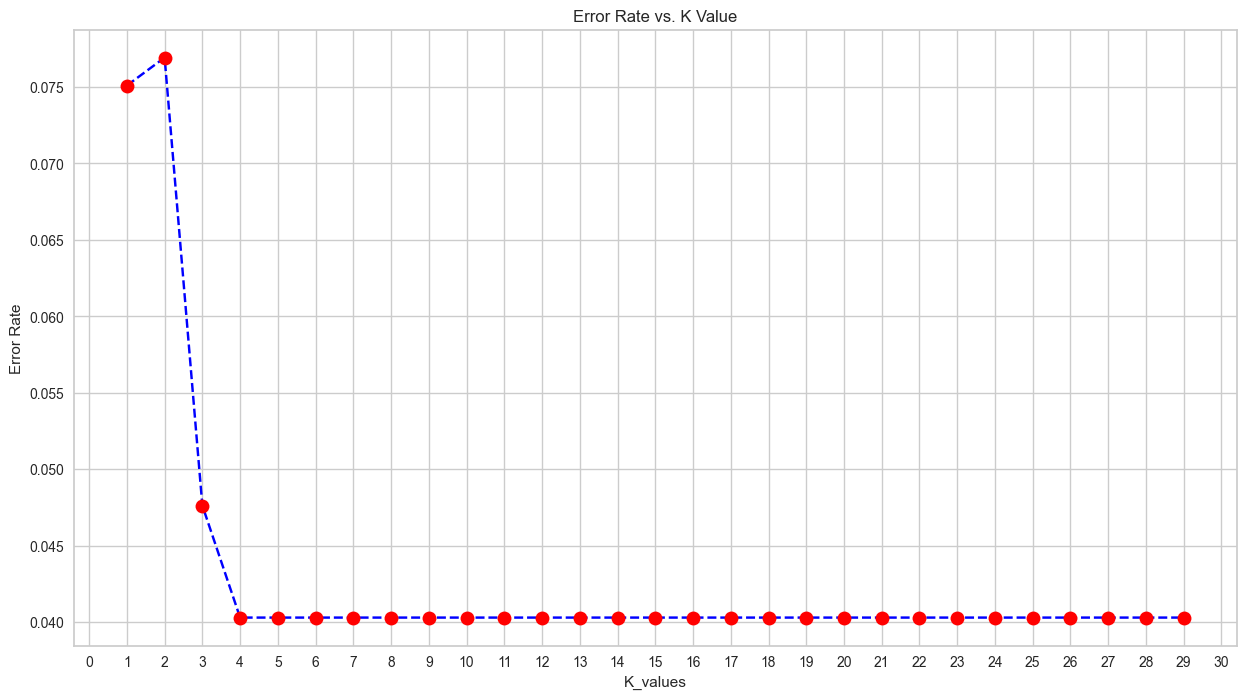

In [26]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

In [30]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
print('WITH K=4\n')
eval_metric(knn, X_train, y_train, X_test, y_test)

WITH K=4

Train_Set
[[270   0   3   2   2   2   2   3]
 [  1 217   1   2   2   1   5   3]
 [  5   0 274   0   1   3   2   1]
 [  3   0   5 248   2   1   3   3]
 [  1   2   2   0 269   1   1   1]
 [  1   2   0   2   0 257   2   1]
 [  2   3   3   3   0   3 245   2]
 [  1   3   2   3   2   1   2 300]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       284
           1       0.96      0.94      0.95       232
           2       0.94      0.96      0.95       286
           3       0.95      0.94      0.94       265
           4       0.97      0.97      0.97       277
           5       0.96      0.97      0.96       265
           6       0.94      0.94      0.94       261
           7       0.96      0.96      0.96       314

    accuracy                           0.95      2184
   macro avg       0.95      0.95      0.95      2184
weighted avg       0.95      0.95      0.95      2184


Test_Set
[[55  0  1  3  0  0  0  0]
 [ 0 52  0 

In [36]:
knn_grid = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [37]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[270   0   3   2   2   2   2   3]
 [  1 217   1   2   2   1   5   3]
 [  5   0 274   0   1   3   2   1]
 [  3   0   5 248   2   1   3   3]
 [  1   1   2   0 270   1   1   1]
 [  0   2   0   2   0 257   3   1]
 [  2   3   3   3   0   3 245   2]
 [  1   3   2   3   2   1   2 300]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       284
           1       0.96      0.94      0.95       232
           2       0.94      0.96      0.95       286
           3       0.95      0.94      0.94       265
           4       0.97      0.97      0.97       277
           5       0.96      0.97      0.96       265
           6       0.93      0.94      0.94       261
           7       0.96      0.96      0.96       314

    accuracy                           0.95      2184
   macro avg       0.95      0.95      0.95      2184
weighted avg       0.95      0.95      0.95      2184


Test_Set
[[55  0  1  3  0  0  0  0]
 [ 0 51  0  0  2  1  

In [38]:
knn_grid_model.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

In [39]:
knn.predict(test[["1","2","3","4","5","6","7","8"]]) + 1

array([3, 3, 2, ..., 7, 5, 6])

In [40]:
knn_grid_model.predict(test[["1","2","3","4","5","6","7","8"]]) + 1

array([3, 3, 2, ..., 7, 5, 6])

In [41]:
submission_son1 = pd.DataFrame()
submission_son1["id"] = test.index

In [42]:
submission_son2 = pd.DataFrame()
submission_son2["id"] = test.index

In [43]:
submission_son1["Öbek İsmi"] = knn.predict(test[["1","2","3","4","5","6","7","8"]]) + 1
submission_son2["Öbek İsmi"] = knn_grid_model.predict(test[["1","2","3","4","5","6","7","8"]]) + 1

In [44]:
submission_son1["Öbek İsmi"].replace({1 : "obek_1", 2: "obek_2", 3 : "obek_3", 4 : "obek_4",
                 5 : "obek_5", 6 : "obek_6", 7 : "obek_7", 8 : "obek_8"}, inplace = True)

In [45]:
submission_son2["Öbek İsmi"].replace({1 : "obek_1", 2: "obek_2", 3 : "obek_3", 4 : "obek_4",
                 5 : "obek_5", 6 : "obek_6", 7 : "obek_7", 8 : "obek_8"}, inplace = True)

In [46]:
submission_son1.to_csv("knn_son1.csv", index = False)

In [47]:
submission_son2.to_csv("knn_son2.csv", index = False)

In [52]:
submission_son1[submission_son1["Öbek İsmi"] != submission_son2["Öbek İsmi"]]

id Öbek İsmi
977    977    obek_5
1616  1616    obek_4
1739  1739    obek_6

In [51]:
submission_son2[submission_son1["Öbek İsmi"] != submission_son2["Öbek İsmi"]]

id Öbek İsmi
977    977    obek_2
1616  1616    obek_8
1739  1739    obek_7

# Model for Random Forest

In [24]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

eval_metric(rf, X_train, y_train, X_test, y_test)

Train_Set
[[281   0   0   0   0   2   0   1]
 [  0 231   0   1   0   0   0   0]
 [  0   0 285   0   0   1   0   0]
 [  0   0   1 263   0   0   1   0]
 [  0   0   0   0 277   0   0   0]
 [  0   0   0   0   0 264   1   0]
 [  0   0   0   0   0   0 261   0]
 [  0   0   0   0   0   0   1 313]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       284
           1       1.00      1.00      1.00       232
           2       1.00      1.00      1.00       286
           3       1.00      0.99      0.99       265
           4       1.00      1.00      1.00       277
           5       0.99      1.00      0.99       265
           6       0.99      1.00      0.99       261
           7       1.00      1.00      1.00       314

    accuracy                           1.00      2184
   macro avg       1.00      1.00      1.00      2184
weighted avg       1.00      1.00      1.00      2184


Test_Set
[[54  0  2  3  0  0  0  0]
 [ 0 52  0  0  1  1  

In [25]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4 , 5, 6, 7],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':range(2,10,1),
             'min_samples_leaf':range(1,10,1)}

rf_grid_model = GridSearchCV(rf, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 3).fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.954 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.957 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.947 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.956 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.945 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=64;, score=0.947 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=64;, score=0.952 total time=   0.2s
[CV 3/5] E

In [26]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[270   0   3   2   2   2   2   3]
 [  2 215   1   2   3   1   5   3]
 [  5   0 274   0   1   3   2   1]
 [  3   0   5 248   2   1   3   3]
 [  1   1   2   0 270   1   1   1]
 [  0   2   0   2   0 257   3   1]
 [  2   3   3   3   0   3 245   2]
 [  1   3   2   3   2   1   2 300]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       284
           1       0.96      0.93      0.94       232
           2       0.94      0.96      0.95       286
           3       0.95      0.94      0.94       265
           4       0.96      0.97      0.97       277
           5       0.96      0.97      0.96       265
           6       0.93      0.94      0.94       261
           7       0.96      0.96      0.96       314

    accuracy                           0.95      2184
   macro avg       0.95      0.95      0.95      2184
weighted avg       0.95      0.95      0.95      2184


Test_Set
[[54  0  2  3  0  0  0  0]
 [ 1 51  0  0  1  1  

In [27]:
rf_grid_model.best_params_

{'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 50}

{'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 50}

In [28]:
rf = RandomForestClassifier(**rf_grid_model.best_params_)

rf.fit(X, y)

eval_metric(rf, X_train, y_train, X_test, y_test)

Train_Set
[[269   0   4   2   2   2   2   3]
 [  1 216   1   2   3   1   5   3]
 [  5   0 274   0   1   3   2   1]
 [  3   0   5 248   2   1   3   3]
 [  1   0   2   0 271   1   1   1]
 [  0   2   0   2   0 257   3   1]
 [  2   3   3   3   0   3 245   2]
 [  1   3   2   3   2   1   2 300]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       284
           1       0.96      0.93      0.95       232
           2       0.94      0.96      0.95       286
           3       0.95      0.94      0.94       265
           4       0.96      0.98      0.97       277
           5       0.96      0.97      0.96       265
           6       0.93      0.94      0.94       261
           7       0.96      0.96      0.96       314

    accuracy                           0.95      2184
   macro avg       0.95      0.95      0.95      2184
weighted avg       0.95      0.95      0.95      2184


Test_Set
[[54  0  2  3  0  0  0  0]
 [ 0 52  0  0  1  1  

In [31]:
submission_son = pd.DataFrame()
submission_son["id"] = test.index

In [32]:
submission_son["Öbek İsmi"] = rf.predict(test[["1","2","3","4","5","6","7","8"]]) + 1

In [33]:
submission_son["Öbek İsmi"].replace({1 : "obek_1", 2: "obek_2", 3 : "obek_3", 4 : "obek_4",
                 5 : "obek_5", 6 : "obek_6", 7 : "obek_7", 8 : "obek_8"}, inplace = True)

In [34]:
submission_son.head()

id Öbek İsmi
0   0    obek_3
1   1    obek_3
2   2    obek_2
3   3    obek_6
4   4    obek_1

In [ ]:
submission_son.to_csv("knn_son.csv", index = False)

In [ ]:
bir = pd.read_csv("son_deneme_final.csv")

In [ ]:
submission_son[submission_son["Öbek İsmi"] != bir["Öbek İsmi"]]

id Öbek İsmi
100    100    obek_6
158    158    obek_1
520    520    obek_2
895    895    obek_2
940    940    obek_6
977    977    obek_5
1122  1122    obek_7
1508  1508    obek_6
1522  1522    obek_5
1563  1563    obek_6
1619  1619    obek_7
2171  2171    obek_3